In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data1 = pd.DataFrame({"TV":[230.1,44.5,17.2,151.5],"Radio":[37.8,39.3,45.9,41.3],
                      "News":[69.1,23.1,34.7,13.2],"Sales" : [22.1,10.4,18.3,18.5]})

print(data1)

X = data1.iloc[:,0:3] # read first two columns into X
y = data1.iloc[:,3] # read the third column into y

# Normalization
X = (X - np.mean(X))/np.std(X)

m = len(y) 

ones = np.ones((m,1))

X = np.hstack((ones, X))
y = y[:,np.newaxis]

X = tf.constant(X,dtype= tf.float32)
Y = tf.constant(y,dtype = tf.float32)

      TV  Radio  News  Sales
0  230.1   37.8  69.1   22.1
1   44.5   39.3  23.1   10.4
2   17.2   45.9  34.7   18.3
3  151.5   41.3  13.2   18.5


In [12]:
num_epochs = 100
num_sample = X.shape[0]
batch_size =10
leanring_rate = 0.01

In [13]:
num_features = X.shape[1]

weights = tf.random.normal((num_features,1))

bias =0

epochs_plot = list()
loss_plot = list()
epoch_loss = list()

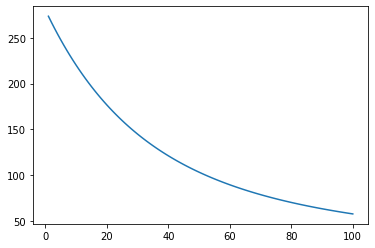

In [14]:
for i in range(100):
    output = tf.tensordot(X,weights,axes =1) + bias
    loss =  tf.reduce_mean(tf.square(output - Y))
    
    epoch_loss.append(loss.numpy())
    
    dJ_dH = tf.reshape(tf.reduce_mean(2 * (output - Y)),[1,1])
    
    dH_dW = X
    
    dJ_dW = tf.reduce_mean(dJ_dH * dH_dW)
    
    dJ_dB = tf.reduce_mean(dJ_dH)
    
    weights = weights -  (leanring_rate * dJ_dW)
    
    bias  = bias - (leanring_rate * dJ_dB)
    
    loss = np.array(epoch_loss).mean()
    
    epochs_plot.append(i +1)
    
    loss_plot.append(loss)
    
plt.plot(epochs_plot,loss_plot)
    